In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit



In [2]:
xg1T_up = pd.read_csv('g1T_up.dat',delim_whitespace=True,names=['x','xg1T_up','xg1T_up_err'])
g1T_up = pd.read_csv('g1T_up_overx.dat',delim_whitespace=True,names=['x','g1T_up','g1T_up_err'])
xg1T_down = pd.read_csv('g1T_down.dat',delim_whitespace=True,names=['x','xg1T_down','xg1T_down_err'])
g1T_down = pd.read_csv('g1t_down_overx.dat',delim_whitespace=True,names=['x','g1T_down','g1T_down_err'])

In [3]:
xg1T_up.head()

,x,xg1T_up,xg1T_up_err
0,0.000100,5.844365e-07,0.000002
1,0.005124,7.059551e-05,0.000093
2,0.010148,2.014844e-04,0.000215
3,0.015172,3.889991e-04,0.000361
4,0.020196,6.320694e-04,0.000527


[-1.20302230e+02  1.37147318e+03 -6.33881383e+03  1.63654194e+04
 -2.67456418e+04  2.93843420e+04 -2.23667146e+04  1.19785661e+04
 -4.56310923e+03  1.24304385e+03 -2.29368532e+02  2.22423313e+01
 -2.34564980e+00  1.20122376e+00  7.72224400e-03  7.87199106e-07]
[ 3.01417165e+04 -2.33814022e+05  8.20430508e+05 -1.72199974e+06
  2.40889510e+06 -2.36860016e+06  1.68217028e+06 -8.72939236e+05
  3.31057133e+05 -9.08762134e+04  1.77084820e+04 -2.36380502e+03
  1.99446166e+02 -1.08892647e+01  1.40108637e+00  6.24673164e-03]


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_59044/4081630450.py:18: RuntimeWarning: divide by zero encountered in divide
  ax[1,0].plot(np.linspace(0,1,400),np.polyval(poly_xg1T_up,np.linspace(0,1,400))/(np.polyval(poly_g1T_up,np.linspace(0,1,400))*np.linspace(0,1,400)),':',color='red')
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_59044/4081630450.py:23: RuntimeWarning: divide by zero encountered in divide
  ax[1,1].plot(np.linspace(0,1,400),np.polyval(poly_xg1T_up,np.linspace(0,1,400))/np.linspace(0,1,400),color='magenta')


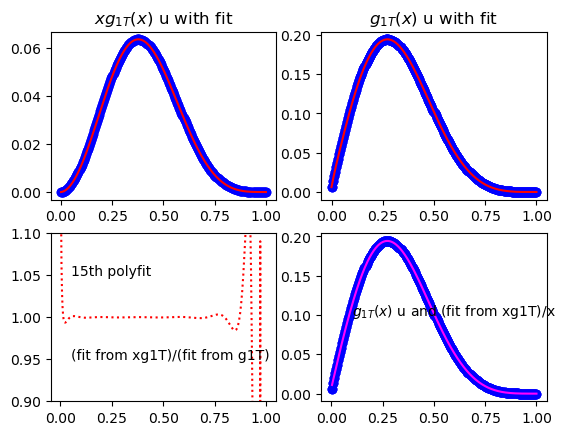

In [62]:
fit_deg=15
fig,ax = plt.subplots(2,2)
ax[0,0].plot(xg1T_up['x'],xg1T_up['xg1T_up'],'bo')

ax[0,0].set_title('$xg_{1T}(x)$ u with fit')
poly_xg1T_up=np.polyfit(xg1T_up['x'],xg1T_up['xg1T_up'],deg=fit_deg)
print(poly_xg1T_up)
ax[0,0].plot(np.linspace(0,1,400),np.polyval(poly_xg1T_up,np.linspace(0,1,400)),color='red')

ax[0,1].plot(g1T_up['x'],g1T_up['g1T_up'],'bo')

ax[0,1].set_title('$g_{1T}(x)$ u with fit')
poly_g1T_up=np.polyfit(g1T_up['x'],g1T_up['g1T_up'],deg=fit_deg)
print(poly_g1T_up)
ax[0,1].plot(np.linspace(0,1,400),np.polyval(poly_g1T_up,np.linspace(0,1,400)),color='red')

ax[1,0].text(0.05,1.05,str(fit_deg)+'th polyfit')
ax[1,0].plot(np.linspace(0,1,400),np.polyval(poly_xg1T_up,np.linspace(0,1,400))/(np.polyval(poly_g1T_up,np.linspace(0,1,400))*np.linspace(0,1,400)),':',color='red')
ax[1,0].set_ylim(0.9,1.1)
ax[1,0].text(0.05,0.95,'(fit from xg1T)/(fit from g1T)')

ax[1,1].plot(g1T_up['x'],g1T_up['g1T_up'],'bo')
ax[1,1].plot(np.linspace(0,1,400),np.polyval(poly_xg1T_up,np.linspace(0,1,400))/np.linspace(0,1,400),color='magenta')
ax[1,1].text(0.1,0.1,'$g_{1T}(x)$ u and (fit from xg1T)/x')

plt.savefig(str(fit_deg)+'_g1T_fit.pdf')

In [6]:
#plt.plot(np.linspace(0,1,400),np.polyval(poly_xg1T_up,np.linspace(0,1,400)),color='red')
